<a href="https://colab.research.google.com/github/fernanda0402/Doutorado/blob/main/Trabalho_3_de_Cosmologia_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercício da aula de 20/10/2022.

1) Plotar a função $\frac{x_e ^2}{1-x_e}$ = A $a^{3/2}$ $e^{-\alpha a}$ em função da $a$, em que $\alpha$ e $A$ são constantes arbitrárias.

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
def f(x):
    return np.sqrt(x**(3/2)*np.exp(-x))

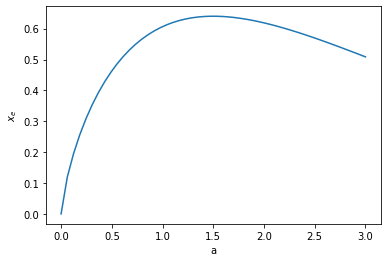

In [4]:
x=np.linspace(0,3)

plt.plot(x,f(x))
plt.xlabel('a')
plt.ylabel('$x_e$')  
plt.show()

2) Pegar o catálogo do ALFALFA e fazer um histograma dos redshifts.

In [5]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
alfalfa = pd.read_csv("/content/drive/MyDrive/a100.code12.table2.190808_modificado_code1_completo.csv",
                       sep=' ',
                       comment='#',
                       names=['agcnr','name','radeg_hi','decdeg_hi','radeg_oc','decdeg_oc','vhelio','w50','sigw','w20','hiflux','sigflux','snr','rms','dist','sigdist','logmh','siglogmh','hicode'])

In [ ]:
print(alfalfa)

                                                   agcnr        name radeg_hi  \
0      AGCNr,Name,RAdeg_HI,DECdeg_HI,RAdeg_OC,DECdeg_...         NaN      NaN   
1                                       105367,........,         NaN      NaN   
2                                       333313,........,         NaN      NaN   
3                                       331060,478-009b,         NaN      NaN   
4                                       331061,456-013.,         NaN      NaN   
...                                                  ...         ...      ...   
25430                                   331054,517-008.,  359.92041,      NaN   
25431                                   331052,Eder.Dw.,  359.93500,      NaN   
25432                                   334869,........,  359.96167,      NaN   
25433                                   332965,........,  359.98166,      NaN   
25434                                   332118,........,  359.98877,      NaN   

       decdeg_hi    radeg_o

In [19]:
import scipy
from scipy import constants
print(constants.speed_of_light)

299792458.0


In [20]:
print("Speed of light in vaccum:", scipy.constants.c)

Speed of light in vaccum: 299792458.0


In [21]:
import scipy.constants
from scipy.constants import c

In [ ]:
z = (alfalfa['vhelio']) / (3* 10**5)

A forma como fiz acima não está dando certo. Não consigo ver o porquê.

Outra forma de fazer:

In [9]:
alfalfa = 'alfalfa_completo.csv'

In [11]:
dados = pd.read_csv(alfalfa, sep=',')
dados.head()

,AGCNr,Name,RAdeg_HI,DECdeg_HI,RAdeg_OC,DECdeg_OC,Vhelio,W50,sigW,W20,HIflux,sigflux,SNR,RMS,Dist,sigDist,logMH,siglogMH,HIcode
0,105367,........,0.00167,5.44333,0.00333,5.44250,11983,274,39,281,1.14,0.08,8.1,1.91,166.0,2.3,9.87,0.05,1
1,333313,........,0.00375,24.90889,359.99750,24.90750,11181,313,20,333,1.80,0.09,11.3,2.02,154.8,2.3,10.01,0.05,1
2,331060,478-009b,0.01042,23.08472,0.01417,23.08750,4463,160,4,184,1.96,0.07,14.7,2.35,50.6,10.4,9.07,0.18,1
3,331061,456-013.,0.01042,15.87222,0.00875,15.88167,6007,260,45,268,1.13,0.09,6.5,2.40,85.2,2.4,9.29,0.06,1
4,104570,........,0.00667,32.70834,0.00500,32.71028,10614,245,6,250,0.86,0.07,6.6,1.86,147.0,2.3,9.64,0.06,1


In [24]:
z = dados['Vhelio'] / (3* 10**5) #z = v/c
cod = dados['HIcode']

v1 = z[(cod==1.)]

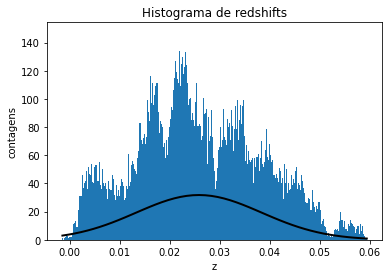

In [25]:
#definindo gaussiana
media = np.mean(v1)
std = np.std(v1)
x = np.linspace(min(v1), max(v1))
p = norm.pdf(x, media, std)

#plot do grafico 
plt.title("Histograma de redshifts")
plt.xlabel('z')
plt.ylabel('contagens')
plt.hist(v1, bins=500)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

Agora, ao invés de escrever (3* 10**5), vamos usar a constante do scipy.

In [26]:
z = dados['Vhelio'] / constants.speed_of_light #z = v/c
cod = dados['HIcode']

v1 = z[(cod==1.)]

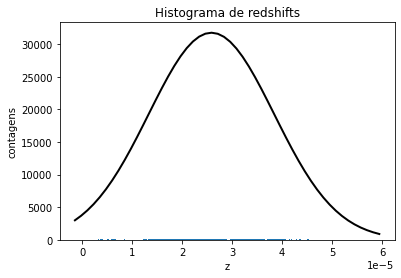

In [27]:
#definindo gaussiana
media = np.mean(v1)
std = np.std(v1)
x = np.linspace(min(v1), max(v1))
p = norm.pdf(x, media, std)

#plot do grafico 
plt.title("Histograma de redshifts")
plt.xlabel('z')
plt.ylabel('contagens')
plt.hist(v1, bins=500)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

Deu diferente. Por quê?